In [28]:
#!pip install yolo5

import cv2
import matplotlib.pyplot as plt
import numpy as np
import copy
import os
%matplotlib inline  

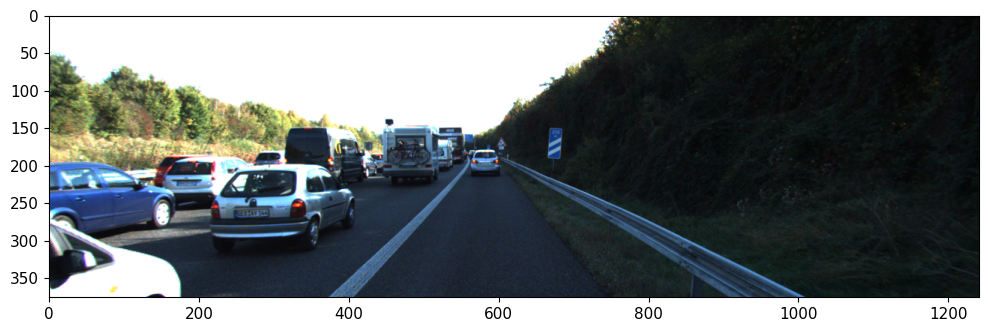

In [16]:

img=cv2.cvtColor(cv2.imread('tracking_course/data/0000000230.png'),cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12,12))
plt.imshow(img)
plt.show()

In [17]:
import yolov5
model=yolov5.load('tracking_course/yolov5s.pt')

YOLOv5  2025-1-22 Python-3.8.20 torch-2.4.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 283 layers, 7276605 parameters, 0 gradients
Adding AutoShape... 


In [19]:
#help(model)
model.conf-0.5
model.iou-0.4
image=copy.deepcopy(img)
results=model(image)

c:\Users\Saransh\miniconda3\envs\allInOne\lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [20]:
predictions = results.pred[0]

boxes = predictions[:, :4].tolist()
scores = predictions[:,4].tolist()
categories = predictions[:,5].tolist()

print(boxes)
print(scores)
print(categories)

[[0.0, 192.1587677001953, 168.08253479003906, 293.1620178222656], [559.3020629882812, 178.25599670410156, 602.397216796875, 212.79237365722656], [212.60202026367188, 195.2044219970703, 408.87469482421875, 318.0950012207031], [133.675537109375, 185.5392303466797, 265.6102600097656, 260.9315490722656], [312.91229248046875, 149.44285583496094, 422.00927734375, 230.48300170898438], [442.70648193359375, 143.23355102539062, 541.7738647460938, 225.81834411621094], [0.0, 258.37310791015625, 177.96131896972656, 375.3357849121094]]
[0.8590246438980103, 0.801026463508606, 0.7878878712654114, 0.7515303492546082, 0.6672031879425049, 0.6477401852607727, 0.5615152716636658]
[2.0, 2.0, 2.0, 2.0, 7.0, 7.0, 2.0]


In [21]:
boxes_int = [[int(v) for v in box] for box in boxes]
categories_int = [int(c) for c in categories]

print(boxes_int)
print(scores)
print(categories_int)

[[0, 192, 168, 293], [559, 178, 602, 212], [212, 195, 408, 318], [133, 185, 265, 260], [312, 149, 422, 230], [442, 143, 541, 225], [0, 258, 177, 375]]
[0.8590246438980103, 0.801026463508606, 0.7878878712654114, 0.7515303492546082, 0.6672031879425049, 0.6477401852607727, 0.5615152716636658]
[2, 2, 2, 2, 7, 7, 2]


In [22]:
def id_to_color(idx):
    """
    Random function to convert an id to a color
    Do what you want here but keep numbers below 255
    """
    blue = idx*5 % 256
    green = idx*12 %256
    red = idx*23 %256
    return (red, green, blue)

def draw_boxes_v5(image, boxes, categories, mot_mode=False):
    h, w, _ = image.shape
    for i, box in enumerate(boxes):
        label = classes[int(categories[i])]
        color = id_to_color(i*10) if mot_mode==True else (255,0,60)
        cv2.rectangle(image, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), color, thickness=3)
        cv2.putText(image, str(label), (int(box[0]), int(box[1])), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), thickness=3)
    return image

In [23]:
classesFile = "tracking_course/coco.names"
with open(classesFile,'rt') as f:
    classes = f.read().rstrip('\n').split('\n')

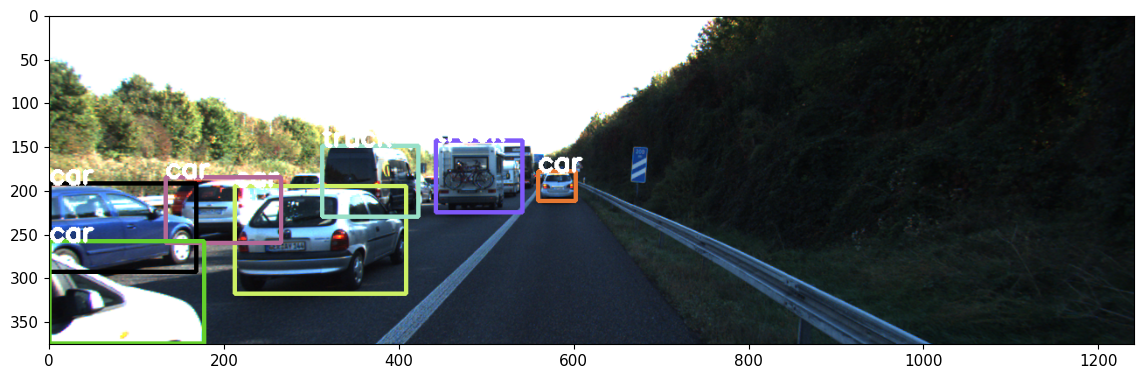

In [24]:
plt.figure(figsize=(14,7))
plt.imshow(draw_boxes_v5(img, boxes, categories,mot_mode=True))
plt.show()

In [25]:
def inference(img):
    results = model(img)
    predictions = results.pred[0]
    boxes = predictions[:, :4].tolist()
    boxes_int = [[int(v) for v in box] for box in boxes]
    scores = predictions[:,4].tolist()
    categories = predictions[:,5].tolist()
    categories_int = [int(c) for c in categories]
    img_out = draw_boxes_v5(img, boxes_int, categories_int, mot_mode=False)
    return img_out, boxes_int, categories_int, scores

In [26]:
import glob 
from tqdm import tqdm

video_images = sorted(glob.glob("tracking_course/data/*.png"))
result_video = []

for img in tqdm(video_images):
    img = cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB)
    img_out, _, _, _ = inference(img)
    result_video.append(img_out)

  0%|          | 0/837 [00:00<?, ?it/s]c:\Users\Saransh\miniconda3\envs\allInOne\lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
  0%|          | 1/837 [00:00<01:31,  9.12it/s]c:\Users\Saransh\miniconda3\envs\allInOne\lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
  0%|          | 2/837 [00:00<01:27,  9.59it/s]c:\Users\Saransh\miniconda3\envs\allInOne\lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
c:\Users\Saransh\miniconda3\envs\allInOne\lib\site-packages\yolov5\models\common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)`

In [27]:
out = cv2.VideoWriter('out_yolo.mp4',cv2.VideoWriter_fourcc(*'MP4V'), 15, (img.shape[1],img.shape[0]))

for img in result_video:
  out.write(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
out.release()